# Ways for Combining 2 different dfs

1. Merging 
2. Concatenating
3. join
4. append

# Merge
along y-axis

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

**Side by side (axis=1) --> merge or join**


**Stacking top of eachother (axis=0) --> concat or append**

merge > join and concat >append

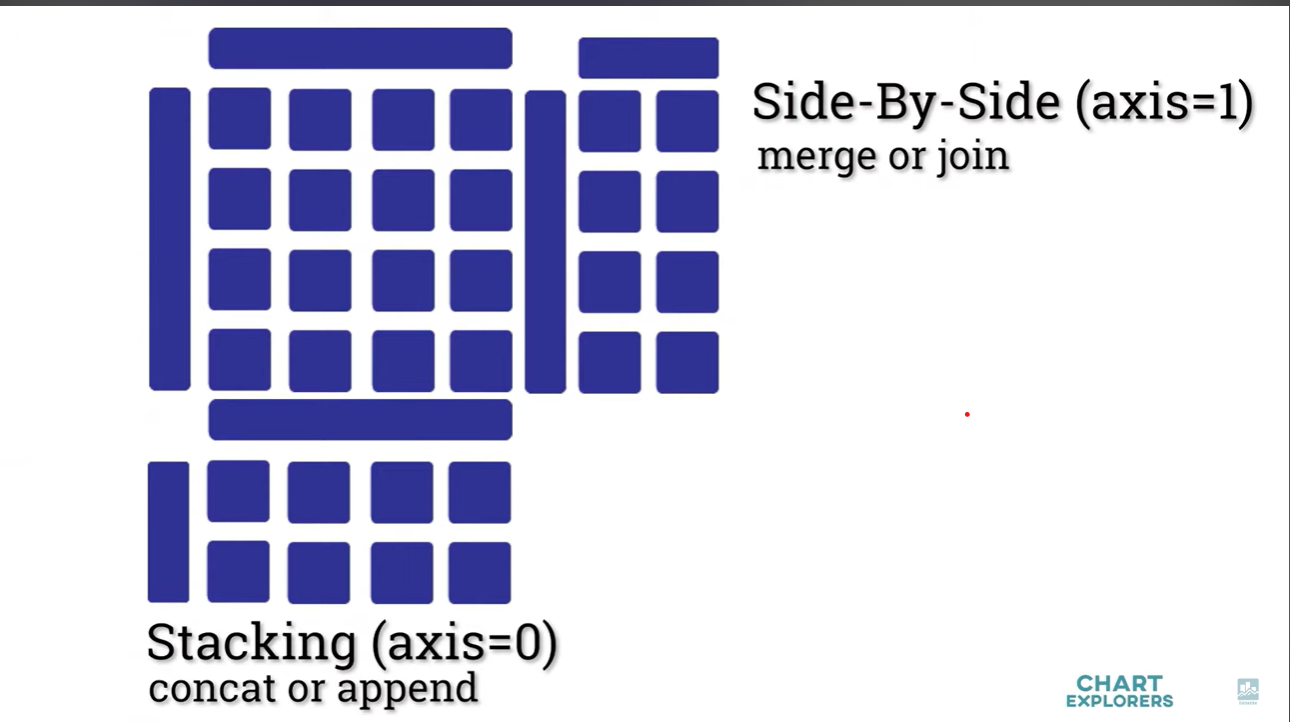

In [66]:
df1 = pd.DataFrame({'ID':[1,2,3,5,9],
                   'col1':[1,2,3,4,5],
                   'col2':[6,7,8,9,10],
                    'col3':[11,12,13,14,15],
                    'col4':['apple','orange','banana','strawberry','raspberry']})

df2 = pd.DataFrame({'ID':[1,1,3,5],
                    'colA':[8,9,10,11],
                    'colB':[12,13,15,17],
                    'col4':['apple','orange','banana','kiwi']})

In [67]:
df1

,ID,col1,col2,col3,col4
0,1,1,6,11,apple
1,2,2,7,12,orange
2,3,3,8,13,banana
3,5,4,9,14,strawberry
4,9,5,10,15,raspberry


In [68]:
df2

,ID,colA,colB,col4
0,1,8,12,apple
1,1,9,13,orange
2,3,10,15,banana
3,5,11,17,kiwi


In [40]:
pd.merge(df1,df2)
# combines the data on common columns 
# here id and col4 are common columns in  dataframe 
# both id and col4 returned column  values

,ID,col1,col2,col3,col4,colA,colB
0,1,1,6,11,apple,8,12
1,3,3,8,13,banana,10,15


In [42]:
# specifying `on` argument 
pd.merge(df1,df2,on='ID')

# 1 AND 2 ROW - ONE TO MANY MAPPING

,ID,col1,col2,col3,col4_x,colA,colB,col4_y
0,1,1,6,11,apple,8,12,apple
1,1,1,6,11,apple,9,13,orange
2,3,3,8,13,banana,10,15,banana
3,5,4,9,14,strawberry,11,17,kiwi


In [44]:
pd.merge(df1,df2,on=['ID','col4'])

# note that its same as output of pd.merge(df1,df2)

,ID,col1,col2,col3,col4,colA,colB
0,1,1,6,11,apple,8,12
1,3,3,8,13,banana,10,15


In [ ]:
# printing dfs for ref

In [47]:
df1

,ID,col1,col2,col3,col4
0,1,1,6,11,apple
1,2,2,7,12,orange
2,3,3,8,13,banana
3,5,4,9,14,strawberry
4,9,5,10,15,raspberry


In [48]:
df2

,ID,colA,colB,col4
0,1,8,12,apple
1,1,9,13,orange
2,3,10,15,banana
3,5,11,17,kiwi


In [46]:
# Suffices and merging on columns that are unique in 2 dfs
pd.merge(df1,df2,suffixes=['_left','_right'],left_on='col2',right_on='colA')

,ID_left,col1,col2,col3,col4_left,ID_right,colA,colB,col4_right
0,3,3,8,13,banana,1,8,12,apple
1,5,4,9,14,strawberry,1,9,13,orange
2,9,5,10,15,raspberry,3,10,15,banana


In [51]:
# merging on indices
pd.merge(df1,df2,suffixes=['_left','_right'],left_index=True,right_index=True)

,ID_left,col1,col2,col3,col4_left,ID_right,colA,colB,col4_right
0,1,1,6,11,apple,1,8,12,apple
1,2,2,7,12,orange,1,9,13,orange
2,3,3,8,13,banana,3,10,15,banana
3,5,4,9,14,strawberry,5,11,17,kiwi


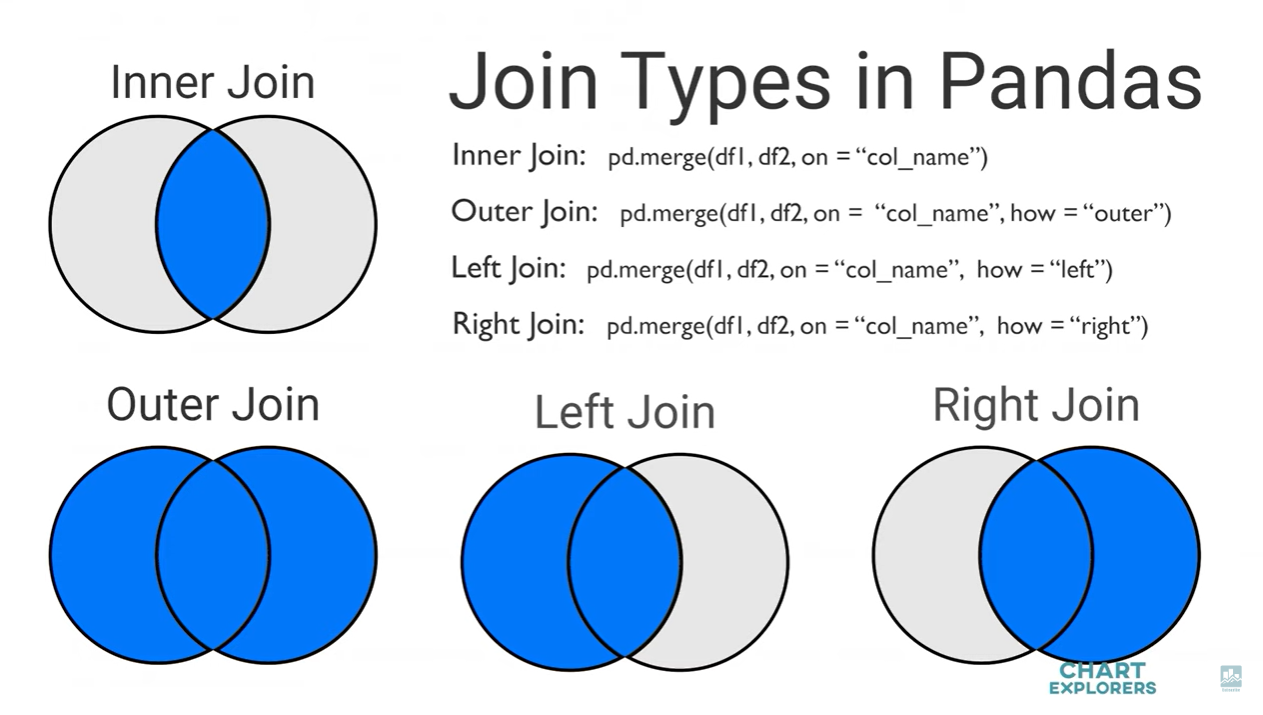

In [69]:
df1

,ID,col1,col2,col3,col4
0,1,1,6,11,apple
1,2,2,7,12,orange
2,3,3,8,13,banana
3,5,4,9,14,strawberry
4,9,5,10,15,raspberry


In [70]:
df2

,ID,colA,colB,col4
0,1,8,12,apple
1,1,9,13,orange
2,3,10,15,banana
3,5,11,17,kiwi


In [71]:
# outer join
pd.merge(df1,df2,on='col4',how='outer',suffixes=['_left','_right'])

,ID_left,col1,col2,col3,col4,ID_right,colA,colB
0,1.0,1.0,6.0,11.0,apple,1.0,8.0,12.0
1,2.0,2.0,7.0,12.0,orange,1.0,9.0,13.0
2,3.0,3.0,8.0,13.0,banana,3.0,10.0,15.0
3,5.0,4.0,9.0,14.0,strawberry,NaN,NaN,NaN
4,9.0,5.0,10.0,15.0,raspberry,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,kiwi,5.0,11.0,17.0


In [73]:
# left join
pd.merge(df1,df2,on='col4',how='left',suffixes=['_left','_right'])

,ID_left,col1,col2,col3,col4,ID_right,colA,colB
0,1,1,6,11,apple,1.0,8.0,12.0
1,2,2,7,12,orange,1.0,9.0,13.0
2,3,3,8,13,banana,3.0,10.0,15.0
3,5,4,9,14,strawberry,NaN,NaN,NaN
4,9,5,10,15,raspberry,NaN,NaN,NaN


In [74]:
# right join
pd.merge(df1,df2,on='col4',how='right',suffixes=['_left','_right'])

,ID_left,col1,col2,col3,col4,ID_right,colA,colB
0,1.0,1.0,6.0,11.0,apple,1,8,12
1,2.0,2.0,7.0,12.0,orange,1,9,13
2,3.0,3.0,8.0,13.0,banana,3,10,15
3,NaN,NaN,NaN,NaN,kiwi,5,11,17


#  Common Errors
1. merging should be done on common columns (use ID and col4)
2. Merge on index
3. Specify left_on and right_on
4. Common columns should have same datatype (consistent  datatype)


# pd.concat

on top of dataframes (along x-axis)

In [75]:
pd.concat([df1,df2])

,ID,col1,col2,col3,col4,colA,colB
0,1,1.0,6.0,11.0,apple,NaN,NaN
1,2,2.0,7.0,12.0,orange,NaN,NaN
2,3,3.0,8.0,13.0,banana,NaN,NaN
3,5,4.0,9.0,14.0,strawberry,NaN,NaN
4,9,5.0,10.0,15.0,raspberry,NaN,NaN
0,1,NaN,NaN,NaN,apple,8.0,12.0
1,1,NaN,NaN,NaN,orange,9.0,13.0
2,3,NaN,NaN,NaN,banana,10.0,15.0
3,5,NaN,NaN,NaN,kiwi,11.0,17.0


In [76]:
# reset the index
pd.concat([df1,df2],ignore_index=True)

,ID,col1,col2,col3,col4,colA,colB
0,1,1.0,6.0,11.0,apple,NaN,NaN
1,2,2.0,7.0,12.0,orange,NaN,NaN
2,3,3.0,8.0,13.0,banana,NaN,NaN
3,5,4.0,9.0,14.0,strawberry,NaN,NaN
4,9,5.0,10.0,15.0,raspberry,NaN,NaN
5,1,NaN,NaN,NaN,apple,8.0,12.0
6,1,NaN,NaN,NaN,orange,9.0,13.0
7,3,NaN,NaN,NaN,banana,10.0,15.0
8,5,NaN,NaN,NaN,kiwi,11.0,17.0


In [78]:
# can side-by-side by specifying the axis=1
pd.concat([df1,df2],axis=1)

,ID,col1,col2,col3,col4,ID,colA,colB,col4
0,1,1,6,11,apple,1.0,8.0,12.0,apple
1,2,2,7,12,orange,1.0,9.0,13.0,orange
2,3,3,8,13,banana,3.0,10.0,15.0,banana
3,5,4,9,14,strawberry,5.0,11.0,17.0,kiwi
4,9,5,10,15,raspberry,NaN,NaN,NaN,NaN


In [82]:
# joins available - inner and outer joins only
# default - outer join

pd.concat([df1,df2],join='inner')


,ID,col4
0,1,apple
1,2,orange
2,3,banana
3,5,strawberry
4,9,raspberry
0,1,apple
1,1,orange
2,3,banana
3,5,kiwi


# df.append

In [83]:
df1

,ID,col1,col2,col3,col4
0,1,1,6,11,apple
1,2,2,7,12,orange
2,3,3,8,13,banana
3,5,4,9,14,strawberry
4,9,5,10,15,raspberry


In [84]:
df2

,ID,colA,colB,col4
0,1,8,12,apple
1,1,9,13,orange
2,3,10,15,banana
3,5,11,17,kiwi


In [85]:
df1.append(df2)

C:\Users\SURUTHI S\AppData\Local\Temp\ipykernel_5736\3062608662.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2)


,ID,col1,col2,col3,col4,colA,colB
0,1,1.0,6.0,11.0,apple,NaN,NaN
1,2,2.0,7.0,12.0,orange,NaN,NaN
2,3,3.0,8.0,13.0,banana,NaN,NaN
3,5,4.0,9.0,14.0,strawberry,NaN,NaN
4,9,5.0,10.0,15.0,raspberry,NaN,NaN
0,1,NaN,NaN,NaN,apple,8.0,12.0
1,1,NaN,NaN,NaN,orange,9.0,13.0
2,3,NaN,NaN,NaN,banana,10.0,15.0
3,5,NaN,NaN,NaN,kiwi,11.0,17.0


In [87]:
df1.append(df2,ignore_index=True)

C:\Users\SURUTHI S\AppData\Local\Temp\ipykernel_5736\2717680053.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2,ignore_index=True)


,ID,col1,col2,col3,col4,colA,colB
0,1,1.0,6.0,11.0,apple,NaN,NaN
1,2,2.0,7.0,12.0,orange,NaN,NaN
2,3,3.0,8.0,13.0,banana,NaN,NaN
3,5,4.0,9.0,14.0,strawberry,NaN,NaN
4,9,5.0,10.0,15.0,raspberry,NaN,NaN
5,1,NaN,NaN,NaN,apple,8.0,12.0
6,1,NaN,NaN,NaN,orange,9.0,13.0
7,3,NaN,NaN,NaN,banana,10.0,15.0
8,5,NaN,NaN,NaN,kiwi,11.0,17.0


# tips dataset

In [88]:
tips = sns.load_dataset('tips')

In [89]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [90]:
tips.shape

(244, 7)

In [91]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [92]:
tips.smoker.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [93]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [98]:
billdf = tips.groupby(['sex','smoker'])[['total_bill']].sum()
tipdf = tips.groupby(['sex','smoker'])[['tip']].sum()

In [99]:
billdf

total_bill
sex    smoker            
Male   Yes        1337.07
       No         1919.75
Female Yes         593.27
       No          977.68

In [100]:
tipdf

tip
sex    smoker        
Male   Yes     183.07
       No      302.00
Female Yes      96.74
       No      149.77

In [102]:
# merging by index
pd.merge(billdf,tipdf,left_index=True,right_index=True)

total_bill     tip
sex    smoker                    
Male   Yes        1337.07  183.07
       No         1919.75  302.00
Female Yes         593.27   96.74
       No          977.68  149.77

In [103]:
# `on` argument 
pd.merge(billdf,tipdf,on=['sex','smoker'])

total_bill     tip
sex    smoker                    
Male   Yes        1337.07  183.07
       No         1919.75  302.00
Female Yes         593.27   96.74
       No          977.68  149.77